# Pre-processing data

In this notebook we talk about some of the functions and methods that are commonly used to deal with numeric and categorical columns in our data in preparation to doing machine learning. Without properly pre-processing the data, our ML algorithm will either fail to execute or execute but return results that are incorrect or incomplete. Since we haven't introduced machine learning yet, it's too early to show examples of how this can happen, but we will see examples in future lectures.

As usual, let's begin by reading some data. We want to read the data and find some ways to summarize the data.

In [11]:
import pandas as pd
import numpy as np

auto = pd.read_csv('../Data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's check the data types:

In [2]:
###Horsepower is an object - keep an eye on this one for sure

auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car_name         object
dtype: object

We can see that we have quite a few numeric columns in here. Numeric columns can be **integer**, **float**, or **datetime** columns. However, we also need to be careful: a column like `cylinders` looks numeric, but probably should be treated as a categorical column. Why? Ask yourself which one of these two is more likely:

- do any kind of math with `cylinders`, such as taking the log of it, adding it to another column, or being interested in knowing the average number of cylinders?
- use cylinder as a grouping variable, such as wanting to see the average horsepower **by cylinder**?

We can probably agree that the second case is more likely. For this reason, we need to think of these types of variables as categorical despite them having numeric values.

Let's now look at some distributions for our numeric columns.

Pairplot does a good job of giving info on the data, gives a histogram on the parameters and features and a nice visualization - can see nice correlations between weight and displacement and then mpg and displacement and weight as well, inversly correlated with accel - makes sens

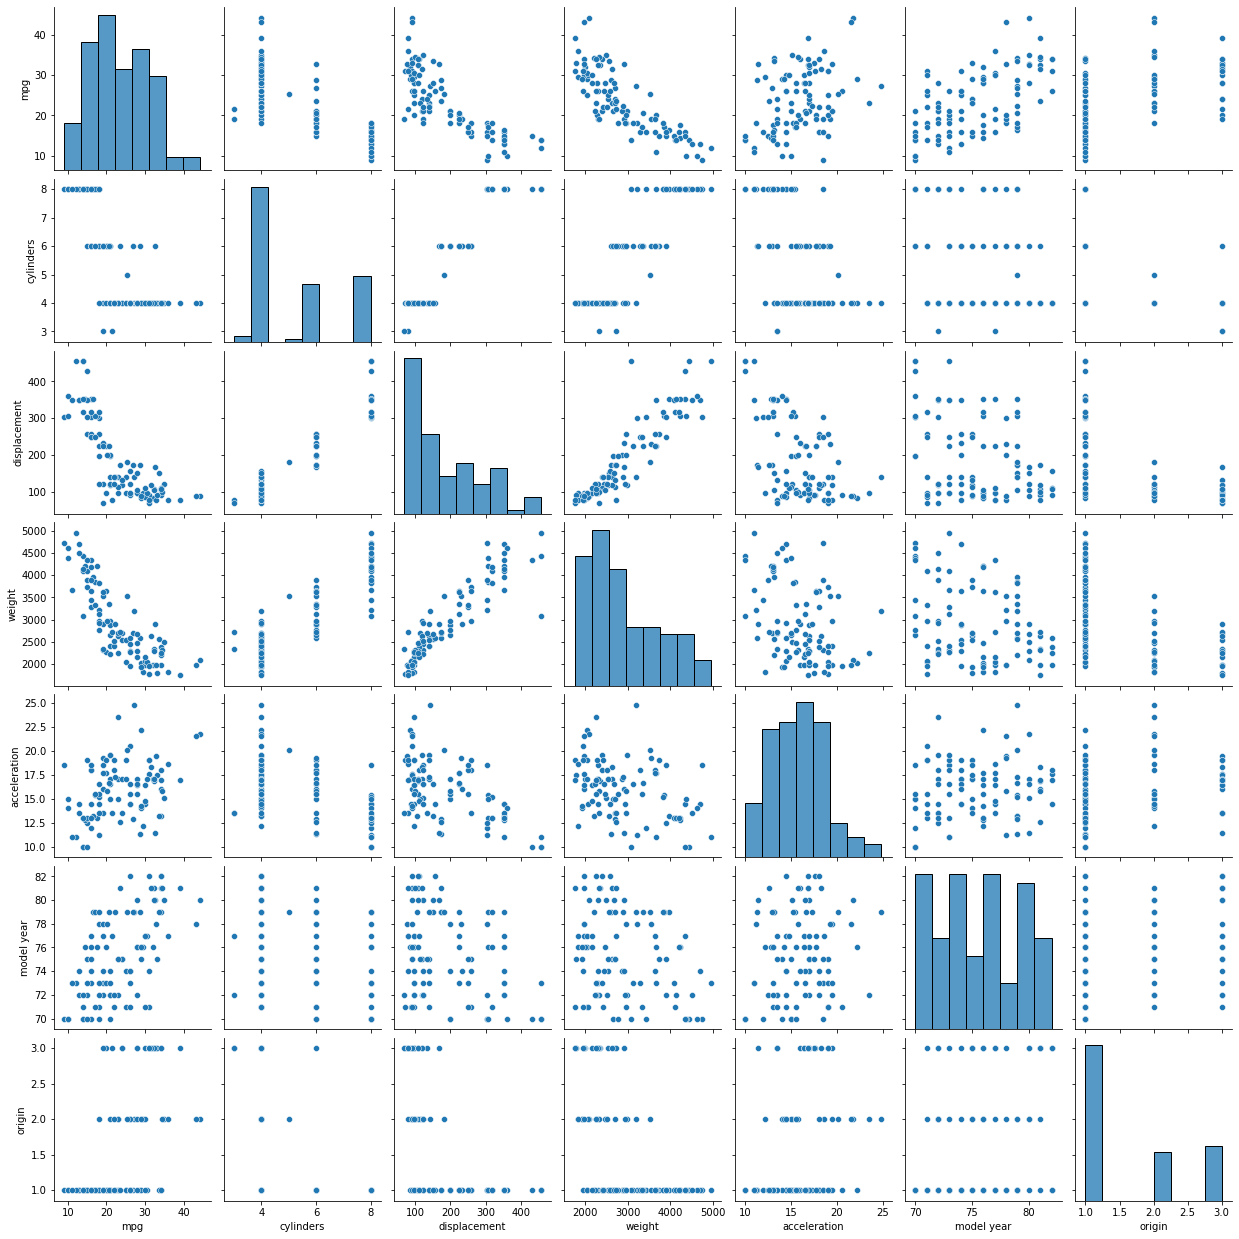

In [3]:
import seaborn as sns
###Is there a good rule of thumb for choosing the sample - prefer to be able to plot full dataset but it can become too cumbersome so try to select as much as you can to display the data

###Look at histograms if you want to take a look at categorical data
sns.pairplot(auto.sample(100));

None of the feature seem to have any extreme values. Let's check for missing values. To see if any columns in the data are missing, we can use the `isnull` method, followed by `any` where the `axis = 0` is used to ask if **any** of values **across columns** is null: `False` means that none is missing, and `True` means that at least one value is missing.

In [6]:
##Looking at data itself and rows accordingly - any will do boolean

auto.isnull().any(axis = 0)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car_name        False
dtype: bool

Even better would be to use `sum` to get the count of rows in for each column that are missing.

In [7]:
###Better way to look at the data is to do sum, can get actual values - preference on this method

auto.isnull().sum(axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

Note that all of this would work only if the missing data is properly marked as null. Often when reading external data sources, other conventions are used to mark data as missing, such as using `-999` for numeric data, or the string `NA` or `?` or the empty string for categorical data. Such values by default would not be picked up by `isnull`. So we would need to first recode them as `np.nan`.

### Exercise (8 minutes)

Let's illustrate the above point with an example, let's intentially introduce a few missing values in the data, but using characters that won't be recognized as such.

In [8]:
###To add in false data, have clean data so lets start messing up the data so we can clean it up and take a look
auto.loc[2, ['mpg', 'car_name']] = [-999, ""] # make mpg and car_name in the 3st row NA
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,-999.0,8,318.0,150.0,3436.0,11.0,70,1,
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


- Check to see if `pandas` can detect the missing values.

In [9]:
###First way to take a look is to look if anything is missing in car name - look at the string and see if any are blank


auto.loc[:,'car_name'] == ''

0      False
1      False
2       True
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: car_name, Length: 398, dtype: bool

- Replace the above missing values with `np.nan` and check if the missing values now show.

In [10]:
auto.loc[auto.loc[:, 'car_name']=='', 'car_name']=None

In [11]:
###Group the missing values or groups of outliers and that can be a feature by itself
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,-999.0,8,318.0,150.0,3436.0,11.0,70,1,None
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
###Could use the np.nan for the horsepower

auto.loc[auto.loc[:,'car_name'] == '','car_name'] = np.nan

In [13]:
auto[auto['car_name'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
2,-999.0,8,318.0,150.0,3436.0,11.0,70,1,None


- Now show any rows in the data that have any missing values. HINT: you will need to change `axis = 1`.

In [14]:
auto.isnull().sum(axis = 1)

0      0
1      0
2      1
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Length: 398, dtype: int64

We also can see from the scatter plot matrix that `weight` and `displacement` have a **positive relationship** (as one goes up, so does the other, and vice versa). We may wonder if `cylinders` plays a part.

- Plot the scatter plot between `weight` and `displacement`, color-coded by `cylinders`.

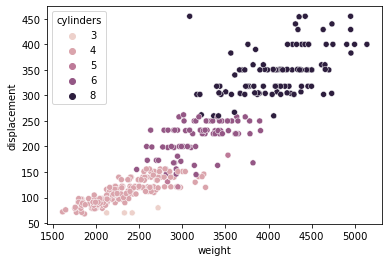

In [20]:
import seaborn as sns
###Displacement requires a higher amount of cylinders as it goes up
#Could also use acceleration or something, dont want to use horsepower due to it not telling a story, can also look at the mpg but remove the -999 first
sns.scatterplot(data=auto, x="weight", y="displacement", hue="cylinders")

- Obtain some basic summary statistics for `acceleration`. HINT: Use `describe`.

In [23]:
###Returns a dataframe with each of these elements
auto['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

Notice that the result of `describe` itself looks look a `DataFrame`. That means that if we wanted to extract certain pieces out of it, we should be able to do it using the methods we learned for working with `DataFrame` objects.

- Extract the mean and standard deviation for acceleration from the results above and store them in variables called `acc_mean` and `acc_std`. Then print a statement that states what the mean and standard deviations are.

In [25]:
###Can take out any of the data you want accordingly - 25%, std, etc...

acceleration_stats = auto['acceleration'].describe()
acc_mean = acceleration_stats['mean']
print(acc_mean)
acc_std = acceleration_stats['std']
print(acc_std)

15.568090452261307
2.757688929812676


### End of exercise

There are other functions we can use to get additional summary statistics from the data. For example, notice that `describe` only shows us the 25th, 50th, and 75th **percentiles**. The $p$th percentile is **a value such that $p$ percent of the data is below that value**, which means the remaining $1-p$ percent of the data is above that value. For example, if the 25th percentile for acceleration `mpg` is 17.5, then 25 percent of cars in our data have `mpg` below 17.0. The 50th percentile is also known as the **median**.

Looking at percentiles helps us get a feel for the distribution of the data. For example, looking at very low or very high percentiles can help us identify **outliers** or **extreme values**. We can use the `quantile` method to get any percentile we want:

In [26]:
auto.quantile(q = [0, 0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1])

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0.00,-999.000,3.00,68.00,1613.00,8.000,70.0,1.0
0.01,10.970,3.97,70.97,1772.61,9.485,70.0,1.0
0.05,13.000,4.00,85.00,1923.50,11.285,70.0,1.0
0.25,17.125,4.00,104.25,2223.75,13.825,73.0,1.0
0.50,23.000,4.00,148.50,2803.50,15.500,76.0,1.0
0.75,29.000,8.00,262.00,3608.00,17.175,79.0,2.0
0.95,37.030,8.00,400.00,4464.00,20.415,82.0,3.0
0.99,43.418,8.00,440.42,4951.03,22.239,82.0,3.0
1.00,46.600,8.00,455.00,5140.00,24.800,82.0,3.0


Now let's see how we can obtain these same summary statistics, but grouped by `cylinders`. There is already one way we know how to do that: we can first subset the data by `cylinders == 3` and run the summary statistic, then do the same for `cylinders == 4`, etc.

In [27]:
###Good way to look at the data if there is a binned feature (cylinders, car wheels, etc...)
##Depends the business scenario that you are trying to consider when is the water not drinkable, some weather pattern within a certain period of time (Texas) and doing a summary of the weather at that time
auto.loc[auto['cylinders'] == 4, :].describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,204.000000,204.0,204.000000,204.000000,204.000000,204.000000,204.000000
mean,29.286765,4.0,109.796569,2308.127451,16.601471,77.073529,1.985294
std,5.710156,0.0,21.512147,347.093936,2.382210,3.753420,0.833285
min,18.000000,4.0,68.000000,1613.000000,11.600000,70.000000,1.000000
25%,25.000000,4.0,91.000000,2045.750000,14.800000,74.000000,1.000000
50%,28.250000,4.0,105.000000,2232.000000,16.200000,78.000000,2.000000
75%,33.000000,4.0,121.250000,2566.750000,18.000000,80.000000,3.000000
max,46.600000,4.0,156.000000,3270.000000,24.800000,82.000000,3.000000


But of course the above way is tedious. Instead, we can use the `groupby` method to do it all at once. For example, here's the average of each column grouped by `cylinders`.

In [30]:
###Aggregating the data together to use them as an index

auto.groupby('cylinders').mean()

,mpg,displacement,weight,acceleration,model year,origin
cylinders,,,,,,
3,20.550000,72.500000,2398.500000,13.250000,75.500000,3.000000
4,29.286765,109.796569,2308.127451,16.601471,77.073529,1.985294
5,27.366667,145.000000,3103.333333,18.633333,79.000000,2.000000
6,19.985714,218.142857,3198.226190,16.263095,75.928571,1.190476
8,5.089320,345.009709,4114.718447,12.955340,73.902913,1.000000


A slightly confusing thing happens if we use `describe` instead of `mean`:

In [32]:
###Would want to put the data into a dataframe and then use slicing or loc to extract it

auto.groupby('cylinders').describe()

mpg                                                          \
           count       mean        std    min    25%    50%    75%   max   
cylinders                                                                  
3            4.0  20.550000   2.564501   18.0  18.75  20.25  22.05  23.7   
4          204.0  29.286765   5.710156   18.0  25.00  28.25  33.00  46.6   
5            3.0  27.366667   8.228204   20.3  22.85  25.40  30.90  36.4   
6           84.0  19.985714   3.807322   15.0  18.00  19.00  21.00  38.0   
8          103.0   5.089320  99.945616 -999.0  13.00  14.00  16.00  26.6   

          displacement              ... model year       origin            \
                 count        mean  ...        75%   max  count      mean   
cylinders                           ...                                     
3                  4.0   72.500000  ...      77.75  80.0    4.0  3.000000   
4                204.0  109.796569  ...      80.00  82.0  204.0  1.985294   
5                  3.0  145.000000  ...      79.50  80.0    3.0  2.000000   
6                 84.0  218.142857  ...      78.00  82.0   84.0  1.190476   
8                103.0  345.009709  ...      76.00  81.0  103.0  1.000000   

                                              
                std  min  25%  50%  75%  max  
cylinders                                     
3          0.000000  3.0  3.0  3.0  3.0  3.0  
4          0.833285  1.0  1.0  2.0  3.0  3.0  
5          0.000000  2.0  2.0  2.0  2.0  2.0  
6          0.548298  1.0  1.0  1.0  1.0  3.0  
8          0.000000  1.0  1.0  1.0  1.0  1.0  

[5 rows x 48 columns]

The problem with the above table is that there's a lot of information packed in it. Each value of `cylinders` has its own row, which is fine. But the columns look like they have a hierarchical structure, which makes sense because we asked for many summary statistics for each column.

So what if for example we wanted to store all the results from the above table, and then look at the results for `acceleration` only. Turns out we can do the same thing we usually do, just go one level deeper.

In [35]:
results_all = auto.groupby('cylinders').describe()
results_all['acceleration']['min']

cylinders
3    12.5
4    11.6
5    15.9
6    11.3
8     8.0
Name: min, dtype: float64

The difference with before is that `results_all['acceleration']` isn't just a single column, but is itself a `DataFrame`. That's because `results_all` has hierarchical columns, so its columns are themselves `DataFrame` objects. So if we want to drill further down to a specific column, such as `std`, we need to go one level deeper.

In [36]:
results_all['acceleration']['std']

cylinders
3    0.500000
4    2.382210
5    2.369247
6    2.021140
8    2.224759
Name: std, dtype: float64

So far it looks like hierarchical columns are not that complicated. However, things do get a little confusing when we want to cross the hierarchy the other way around. For example, let's say we want to quickly compare the standard deviations of all our columns, grouped by `cylinders`. This information is in the above table, but how do we extract it?

It turns out that to do this, we need to use the `IndexSlice` function in `pandas`. Here how it works:
- we use `loc` to say which rows and columns we want
- we use `slice(None)` to say we want everything at a given hierarchy
- if we want to filter at any level of hierarchy, we provide the index we want to filter by

In [37]:
###Index slice is another way to extract the data - preferred way to do it, getting single element for all the different features and pulling the data for it
###Can also do groupby or a different column
from pandas import IndexSlice as idx
results_all.loc[: , idx[:, 'std']]

,mpg,displacement,weight,acceleration,model year,origin
,std,std,std,std,std,std
cylinders,,,,,,
3,2.564501,5.000000,247.566153,0.500000,3.696846,0.000000
4,5.710156,21.512147,347.093936,2.382210,3.753420,0.833285
5,8.228204,33.286634,374.343870,2.369247,1.000000,0.000000
6,3.807322,32.293512,332.297419,2.021140,3.251638,0.548298
8,99.945616,46.776376,448.833159,2.224759,3.021214,0.000000


By the way, the same way that we can have hierarchical columns, we can also have hierarchical rows, more specifically hierachical row indexes. Examine the result generated by the cell below. Do see the hierarchical structure of the row index?

In [38]:
auto.groupby('cylinders')[['mpg', 'displacement']].quantile(q = 0.5)

,mpg,displacement
cylinders,,
3,20.25,70.0
4,28.25,105.0
5,25.40,131.0
6,19.00,228.0
8,14.00,350.0


Hierarchical indexes are called `MultiIndex` in `pandas`. This is a more advanced topic and we will leave it at that for now.

### Exercise (7 minutes)

We saw how a histogram shows us counts for **evenly-sized** intervals of a numeric column. But what if we wanted to see counts for any intervals we specify, evenly-sized or not? Here's an example:

- Find out how many cars have `mpg` less than 18, between 18 and 25, and 25 or more? HINT: There are many ways of doing this, so to narrow it down a little do this:
  - use `loc` to limit data to the above ranges
  - use the `shape` method to get row counts

In [21]:
auto[auto['mpg'] < 18].shape

(108, 9)

In [40]:
auto.loc[auto['mpg'] < 18, :].shape

(108, 9)

In [22]:
auto[(auto['mpg'] >= 18) & (auto['mpg'] < 25)].shape

(121, 9)

In [43]:
auto.loc[(auto['mpg'] >= 18) & (auto['mpg'] <25), :].shape

(121, 9)

In [23]:
auto[auto['mpg'] >= 25].shape

(169, 9)

In [44]:
auto.loc[auto['mpg']>=25, :].shape

(169, 9)

There is another, much faster way to solve the exercise above: 

- Use the `pd.cut` function to bin `mpg` and specify `[0, 18, 25, 100]` as the cut-offs (the `bins` argument). Store the results as a new column in the data called `mpg_cat`.

In [51]:
###Does the binning for you and can see the value counts, etc... One of the ones that has the outlier turns into a NaN automatically, Since you set your last bin at 0, it cant comprehend it that low
#Change the value above for good practice
auto['mpg_cat'] = pd.cut(x=auto['mpg'],bins=[0, 18, 25, 100])

- Use `value_counts` to get counts for `mpg_cat`.

In [50]:
auto['mpg_cat'].value_counts

<bound method IndexOpsMixin.value_counts of 0        (0.0, 18.0]
1        (0.0, 18.0]
2                NaN
3        (0.0, 18.0]
4        (0.0, 18.0]
           ...      
393    (25.0, 100.0]
394    (25.0, 100.0]
395    (25.0, 100.0]
396    (25.0, 100.0]
397    (25.0, 100.0]
Name: mpg_cat, Length: 398, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 25] < (25, 100]]>

- Create `mpg_cat` again, but make the following changes to it: 
  - Note that the choice of using 0 and 100 as the lower and upper bounds is a little arbitrary. So use `-np.Inf` and `np.Inf` instead.
  - By default, cut labels the catgories based on the interval range it covers, but we can change the labels to anything we like using the `labels` argument. Rename the labels to `low`, `med` and `high`.

In [54]:
###Look into pd.cut() more, looks like a powerful tool to use and can used on data from verizon as well
#There are many ways to bin the data, just depends on which one is easiest for you to work with and transform - easy to bin for weather ('cold', 'medium', 'hot')
#To set the cut bins to inclusive or exclusive - the 'right' arguement
#there are merges, concat, get_dummies() etc...

auto['mpg_cat'] = pd.cut(x=auto['mpg'],bins=[-np.Inf, 18, 25, np.Inf], labels = ['low', 'med', 'high'])

In [56]:
auto['mpg_cat'].value_counts()

high    158
low     124
med     116
Name: mpg_cat, dtype: int64

### End of exercise

The `pd.cut` function is different from the other functions (or methods) we learned about so far. The `describe`, `mean`, `quantile`, or `value_counts` functions are **feature summarization** functions, but `pd.cut` is a **feature transformation** function, meaning that not only its input, but also its output are features. In the above example, the input to `pd.cut` was `mpg`, and the output was the `mpg_cat` which we chose to append to the data as a new column, but could have also stored in a separate variable. Storing it as a separate variable is a good idea if the variable stores some intermediate values that we use as part of a transformation but don't need anymore afterwards. 

## Working with categorical data

Let's now look at common tasks for treating **categorical data** prior to modeling. Categorical data needs a lot of attention during data pre-processing. This is because most machine learning algorithms don't deal directly with categorical data. Instead we need to **recode** the data from categorical into numeric, and we will see how we do that in this notebook.

Let's begin by reading some data. We will use a marketing data set of bank customers. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

In [57]:
import pandas as pd
import numpy as np

bank = pd.read_csv('../Data/bank-full.csv', sep = ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can see that our data contains many categorical columns, including the target itself. Let's check the data types:

In [58]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can use the `select_dtypes` method to limit the data to just the categorical columns.

In [59]:
###Can pick out the columns by datatype - looking at all of the object data types and showing all of the features

bank.select_dtypes('object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


It turns out there are **two kinds of data types for categorical data** in `pandas`: `object` and `category`. By default, any non-numeric column will inherit the `object` type, but we can later convert it to `category` type. An `object` column type can be modified at will, but a `catogory` type is only appropriate for a column with **a limited number pre-defined categories**. This is because the `category` type is a more rigid data type with additional limitations on what they can store. So this only makes sense when the categories are known and few. Let's illustrate that by turning some of the columns in our data into a `category` columns.

In [60]:
###Can always convert the types to different types - define the binary ones as categorical instead of object - easier to work with

cat_cols = ['marital', 'default', 'housing', 'loan']

bank[cat_cols] = bank[cat_cols].astype('category')

Why would we want to add additional rigidity? Because this way we can impose some amount of **data integrity**. For example, if `marital` should always be limited to "single", "divorced" or "married" then by converting `marital` into a `category` column we can prevent the data from introducing any other category without first adding it as one of the acceptable categories for this column.

In [61]:
bank['marital'].cat.categories

Index(['divorced', 'married', 'single'], dtype='object')

### Exercise (6 minutes)

- Try to change the `marital` column at the second row to the value "widowed". You should get an error.

In [70]:
bank.loc[1,'marital'] = "widowed"

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

- To fix the error, you need to add "widowed" as one of the acceptable categories. Use the `cat.add_categories` method to add "widowed" as a category and then try again to make sure you don't get an error this time.

In [62]:
bank['marital'].cat.add_categories('widowed',inplace=True)
bank.loc[1,'marital'] = "widowed"

- Undo your change by reassigning the `marital` column at the second row to the value "single". Get a count of unique values for `marital` now. Do you notice anything? Explain what and why?

In [63]:
bank.loc[1,'marital'] = "single"

In [67]:
bank['marital'].cat.categories

Index(['divorced', 'married', 'single', 'widowed'], dtype='object')

Categorical columns have other useful methods, and their names speak for themselves, such as
`as_ordered`, `as_unordered`, `remove_categories`, `remove_unused_categories`, `rename_categories`, `reorder_categories`, and `set_categories`. It is important to be aware of this functionality and use it when it makes sense. Of course an alternative to using these is to convert the column back to `object` and make all the changes we want and then turn it back into `category`, but using the above methods makes the code "cleaner".

So we saw that a `category` column has pre-defined categories and a set of methods specific to itself for changing the categories, whereas an `object` column is more a type of **free-form** column where any value is acceptable. One way the above distinction matters if when we need to rename the categories for a categorical column. Changing the categories of a categorical column is an example of **recoding** or **remapping**.

- Let's first begin with an example using `job`, which has type `object`. Rename the category "management" to "managerial". HINT: find all rows where `job` is the string `'management'`, and use `loc` to change those rows to the string `'managerial'`.

In [68]:
bank.loc[bank['job'] == 'management','job'] = 'managerial'

In [69]:
bank[bank['job'] == 'managerial']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,managerial,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
5,35,managerial,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,managerial,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
21,56,managerial,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,no
26,39,managerial,single,tertiary,no,255,yes,no,unknown,5,may,296,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,29,managerial,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45194,59,managerial,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45197,36,managerial,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,managerial,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no


The above apreplacech works fine, but it's tedious if we have a lot of changes we want to make. The better way to do it is to create a Python dictionary that maps old values (values we want to change) to new values, then use the `replace` method to replace them all at once.

- Create such a dictionary and use `replace` to make the following changes in the `job` column:

  - rename `'student'` to `'in-school'`
  - combine `'housemaid'` and `'services'` into a single group called `'catering'`
  - change `unknown` to a missing value, i.e. `np.NaN` (without quotes)

In [76]:
###Doing a little bit of binning here, converting housemaid and services to catering

bank['job'].replace({'student':'in-school', 
                     'housemaid': 'catering', 
                     'services': 'catering', 
                     'unknown': np.nan }, inplace=True)

- Get a count of unique values for `job` to make sure everything worked. Note that `value_counts()` does not provide count for missing values by default. We need to specify `dropna = False` to include missing vaules in the count.

In [77]:
bank['job'].value_counts(dropna = False)

blue-collar      9732
managerial       9458
technician       7597
catering         5394
admin.           5171
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
in-school         938
NaN               288
Name: job, dtype: int64

### End of exercise

The `replace` method works equally well with a column of type `category`, however **it changes its type to `object`!** So either we have to convert it back to `category`, or we need to use the `rename_categories` method to replace values, which workes very similarly to `replace`. Here's an example:

In [78]:
bank['marital'] = bank['marital'].cat.rename_categories({'married': 'taken'})
bank['marital'].value_counts()

taken       27214
single      12790
divorced     5207
widowed         0
Name: marital, dtype: int64

Categorical columns can also be easily generated from numeric columns. For example, let's say we want to have a column called `high_balance` that is `True` when balance exceeds $2,000 and `False` otherwise. Technically this would be a boolean column, but in practice it acts as categorical column. Generating such a column is very easy. We refer to such binary colums as **dummy variables** or **flags** because they single out a group.

In [79]:
###Can also create new bins and new types of data - flag any account greater than 2000 - dummy the variable

bank['high_balance'] = bank['balance'] > 2000

In [80]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,high_balance
0,58,managerial,taken,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,True
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,False
2,33,entrepreneur,taken,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,False
3,47,blue-collar,taken,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,False
4,33,NaN,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,False


The process of creating a dummy variable **for each category** of a categorical feature is called **one-hot encoding**. Let's see what happens if we one-hot-encode `marital`.

In [81]:
###Will do the one hot encoding manually - changing the data type to int and making three new columns

bank['marital_taken'] = (bank['marital'] == 'taken').astype('int')
bank['marital_single'] = (bank['marital'] == 'single').astype('int')
bank['marital_divorced'] = (bank['marital'] == 'divorced').astype('int')

In [82]:
###Three new columns that show if the status is taken, single, or divorced

bank.filter(like = 'marital').head()

,marital,marital_taken,marital_single,marital_divorced
0,taken,1,0,0
1,single,0,1,0
2,taken,1,0,0
3,taken,1,0,0
4,single,0,1,0


One-hot encoding is a common enough task that we don't need to do it manually like we did above. Instead we can use `pd.get_dummies` to do it in one go.

In [83]:
##Can literally do the full dataset when you want to use this - easier way to do this

pd.get_dummies(bank[['marital', 'job']], prefix = ['marital', 'job']).head()

,marital_divorced,marital_taken,marital_single,marital_widowed,job_admin.,job_blue-collar,job_catering,job_entrepreneur,job_in-school,job_managerial,job_retired,job_self-employed,job_technician,job_unemployed
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


There's an even more streamlined way to do one-hot encoding, although at first blush it appears less straight-forward, but there is a reason it is set up this way and we will explain that later. Just like normalization, one-hot-encoding is a common pre-processing task and we can turn to the `sklearn` library to do the hard part for us.

In [84]:
from sklearn.preprocessing import OneHotEncoder

bank_cat = bank.select_dtypes('category').copy() # only select columns that have type 'category'
onehot = OneHotEncoder(sparse = False) # initialize one-hot-encoder
onehot.fit(bank_cat) #Will initialize on the dummies and get the unique values for each of the rows
col_names = onehot.get_feature_names(bank_cat.columns) # this allows us to properly name columns
bank_onehot =  pd.DataFrame(onehot.transform(bank_cat), columns = col_names)
bank_onehot.head()

,marital_divorced,marital_single,marital_taken,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


So we can see that one-hot encoding created a **binary feature** for **each category of each categorical column** in the data. Although to be more specific, we limited it to columns whose type is `category` and excluded columns whose type is `object`. This is because one-hot encoding can quickly blow up the number of columns in the data if we are not careful and include categorical columns with lots of categories (also called **high-cardinality** categorical columns). In such cases, we would one-hot encode only the top $n$ categories (what $n$ should be and what "top" should mean depends on the context). Another 

What is the point of doing this? The reason we do this is that most machine learning algorithms do not work **directly** with categorical data, so we need to encode the categorical data which turns it into numeric data. One-hot encoding is just one type of encoding, but it is the most common one.

One last note about the `sklearn` pre-processing transformations we learned about in this notebook: If you look at examples online, you may notice that instead of calling `fit` and `transform` separately, you can call `fit_transform` which combines the two steps into one. This may seem reasonable and saves you one extra line of code, but we discourage it. The following exercise will illustrate why, but the main reason will become clear when we talk about machine learning.

### Exercise (5 minutes)

We want to one-hot-encode the `education` and `month` columns in the data. 

- First create an instance of the one-hot encoder and invoke fit on it, but **do not run `transform` yet**.

In [97]:
###Sidenote - also note that it removes the original columns as part of the test
bank_ed_mon = bank[['education','month']].copy()
onehot = OneHotEncoder(sparse = False) # initialize one-hot-encoder
#onehot = OneHotEncoder(sparse = False,handle_unknown = 'ignore') # initialize one-hot-encoder - notice that the ignore is gone now


In [98]:

onehot.fit(bank_ed_mon)
col_names = onehot.get_feature_names(bank_ed_mon.columns) # this allows us to properly name columns

- We now introduce a change: We replace the value for `education` at the second row with `'PhD'` (assuming that's a new category). Note that `education` is of type `object`, so we can set it to anything we want.

In [99]:
###When you have a new column or a new test data coming in can be an issue but with one hot encoder from sklearn is that when you fit the model
###you fit it on the training data already that existed inside of the training data, using the same test data is just fine 

bank_ed_mon.loc[1, 'education'] = 'PhD' # introduce a category unseen when we ran fit
bank_ed_mon.head()

,education,month
0,tertiary,may
1,PhD,may
2,secondary,may
3,unknown,may
4,unknown,may


The important point here is that we introduce this additional category **after** we ran `fit` on the one-hot encoder above.

- Try to run `transform` on the data to one-hot encode the features now, and report what happens.

In [100]:
#If initial one hot encoder is not set to ignore, then when you pass in a new category it will give you a problem, with ignore it doesnt even give you an issue, it just ignores it and throws it out
#no education_PHD in the dataset at all
bank_onehot =  pd.DataFrame(onehot.transform(bank_ed_mon,), columns = col_names)
bank_onehot.head()

ValueError: Found unknown categories ['PhD'] in column 0 during transform

Is it a good thing that we got an error? The answer is it depends: 

- If we are okay with letting new categories slip through, we can return to where we initiated `OneHotEncoder` and change the `handle_unknown = 'ignore'` (default value is `'error'`). Make this change and rerun the code. What is the one-hot encoded value for `job` at the row that we changed?
- If you want to make sure that we preserve **data integrity** so that the data we call `transform` on matches the schema of the data we ran `fit` on, then we want errors like this to stop us in our tracks so we have a change to see why the data changed. 

### End of exercise

So we saw that using `fit` and `transform`, we can impose a sort of data integrity at training time and enforce it at transform time, and this is true even if the column is of type `object`. This is very similar to what how a column of type `category` works. In fact, if `education` was of type `category` instead of `object`, then we would not have been able to add a new category on the fly, and we would have caught the error pointed in the above exercise earlier.

One final note about one-hot encoding: there are more sophisticated way that we can perform one-hot encoding by using hash functions. We leave the reader to read about **feature hashing** (if you know what **hash functions** are, then feature hashing is very easy to grasp). This method has the advantage that we do not need to know what the categories are ahead of time. Not only does this free us from keeping track of the categories, but it also means that we don't have to load the pre-defined list of categories with the model **at score time** when the model is deployed: We just use the hash function to compute it on the fly. This can make scoring much more efficient when the size of features is large.

# Assignment

Feature selection refers to algorithms that can help us narrow down our **feature set** to a smaller set of important features, where importance here refers to the strength of the relationship between the feature and the target. A more important feature is one that ultimately can influence the model's prediction more. In this assignment, you will write a program that imploments filter-based feature selection.

**Filter-based selection** refer to methods we can use to identify pairs of features with a high correlation and remove one of them from the data. One way we can measure the degree to which two features are associated is using **correlation**, but correlation (**pearson's correlation coefficient**, to be specific) measures the strength of **linear association** meaning that when correlation is high between two features (close to 1 or -1) then their scatter plot looks like a straight line. If instead of a straight line the scatter plot followed a curved line, we need to use other measures such as **ranked correlation** or **mutual information**.

In the following example, we generate two features $X$ and $Y$ which are related to each other based on a polynomial (curve-like) equation with some added noise.

Standard Deviation of Y = 1.20


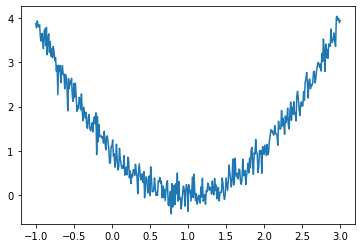

In [2]:
import numpy as np
import pandas as pd

X = np.linspace(start = -1, stop = 3, num = 401, endpoint = True)
Y = X**2 - 2*X + 1 # Y is a polynomial function of X
print("Standard Deviation of Y = {:0.2f}".format(np.std(Y)))

noise_var = 0.2
noise = np.random.normal(0, noise_var, len(X))
Y += noise # add noise

import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.show()

Of course we can can just plot the features against each other and see how they're related, but imagine having to do this for every pair of some 20 features. So instead we want to rely on some metric to do this, so that we can later simply filter out redundant features based on correlation or some other metric. Let's see what the correlation coefficient is.

In [3]:
corr = np.corrcoef(X, Y)[0, 1]
print("Correlation between X and Y is {:0.8f}".format(corr))

Correlation between X and Y is -0.00214071


As we can see, the correlation is close to zero, and if we had not plotted $X$ against $Y$, we would have been led to believe that there is no association between them, but let's now use mutual information to capture the stregth of their association.

In [4]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency = c_xy)
    return mi

print("Mutual information = {:0.2f}".format(calc_MI(X, Y, 20)))

Mutual information = 1.51


Now that you learned about mutual information, you are going to use it for the purpose of feature selection. Return to the `retail-churn.csv` dataset that we worked with in the previous assignment.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

churn = pd.read_csv('../Data/retail-churn.csv')
churn.head()

churn.shape

(92587, 9)

Run the following steps to pre-process the data:

1. Convert `Timestamp` into a `datetime` column and extract two new columns: `DoW` is the day of the week and `Month` is the calendar month. <span style="color:red" float:right>[1 point]</span>

Reasoning - Will take a look at the initial column types just to get an idea for what kind of data I will be dealing with. Then I will use the dt.day/month_name to convert the datetime column into two new ones, DoW and Month for further processing

In [6]:
churn.dtypes #Taking an initial look into the datatypes to see if anything else needs to get changed for later on

UserId             int64
Age               object
Address           object
Column 0           int64
TransactionId      int64
Timestamp         object
ItemId           float64
Quantity           int64
Value              int64
dtype: object

In [7]:
churn.isnull().sum(axis=0) #Want to make sure there are no null values that I need to adjust / correct first

UserId           0
Age              0
Address          0
Column 0         0
TransactionId    0
Timestamp        0
ItemId           0
Quantity         0
Value            0
dtype: int64

In [8]:
churn['Timestamp']=pd.to_datetime(churn['Timestamp'])

churn['DoW']=churn['Timestamp'].dt.day_name()
churn['Month']=churn['Timestamp'].dt.month_name()
churn.head()

churn.shape

(92587, 11)

Conclusion - Was able to get the DoW and Month column all set up as well as converting the timestamp column to datetime all using pandas functions. Furthermore, did an initial check on the null values in the columns to make sure there werent any

2. One-hot encode `Address`, `DoW` and `Month`. Your pre-processed data should only contain the features created above as well as `Quantity` and `Value`. <span style="color:red" float:right>[1 point]</span>

Reasoning - I will use the pandas.get_dummies function to dummy the columns I would like and to also change the datatype. ALso need to add the columns, quantity and value, into my new dataframe


###Added the quantity and value the correct way???

In [10]:
churn.dtypes

UserId                    int64
Age                      object
Address                  object
Column 0                  int64
TransactionId             int64
Timestamp        datetime64[ns]
ItemId                  float64
Quantity                  int64
Value                     int64
DoW                      object
Month                    object
dtype: object

In [9]:
##Can literally do the full dataset when you want to use this - easier way to do this

churn_dummy = pd.get_dummies(churn[['DoW', 'Month', 'Address']], prefix=['DoW', 'Month', 'Address'], dtype=int)
churn_dummy['Quantity']= pd.Series(churn['Quantity'])#Adding quantity from churn dataframe
churn_dummy['Value']=pd.Series(churn['Value'])#Adding value from churn dataframe
churn_dummy.columns

churn_dummy

,DoW_Friday,DoW_Monday,DoW_Saturday,DoW_Sunday,DoW_Thursday,DoW_Tuesday,DoW_Wednesday,Month_December,Month_November,Address_A,Address_B,Address_C,Address_D,Address_E,Address_F,Address_G,Address_H,Quantity,Value
0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,37
1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,17
2,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,23
3,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,41
4,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,8,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92582,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,85
92583,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1026
92584,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,4,624
92585,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,68


Conclusion - was able to get the new dataframe (churn_dummy) set up approriately and have all of the necessary columns as well. I used series instead of concat, are there any issues associated with that???

3. Now write a function called `reduce_dimensionality`. The input to the function is the pre-processed data. Here's what your function does:
  - It finds the mutual information between all possibles pairs of features in the data. <span style="color:red" float:right>[1 point]</span>
  - If the mutual information is less than some value `threshold` (make it an argument to the function), then it moves on to the next pair. <span style="color:red" float:right>[1 point]</span>
  - If the mutual information is greater than `thershold`, it drops one of the two features (doesn't matter which) from the data. <span style="color:red" float:right>[1 point]</span>

  So the above function should return the data, but with only a subset of the original features so that no two features share a mutual information higher than `threshold`.

Reasoning - Struggled on this one, I drew from the code above that was left for calculating the calc_MI (mutual information) and also left it at 20 bins - not sure if that is a standard or not but I changed it to 30 to switch it up

Questions
1) Do I use the correlation matrix to pass into my function??? No, bad idea

2) Should I get the abs.() value for the matrix? Or leave it with negatives??

In [191]:
from sklearn.metrics import mutual_info_score
from itertools import combinations

def calc_MI(x, y, bins): #Copied section from code above that was provided - left
    c_xy = np.histogram2d(x, y, bins)[0]
    mi_s=mutual_info_score(None, None, contingency = c_xy)
    return mi_s

def reduce_dimensionality(df, threshold):
    ###Defining the name and the items to be passed in, the dataframe and a threshold - looking at pairs of possibilities and looping###
    df_reduced = df.copy() #Making a copy to populate
    pairs=list(combinations(df.columns, 2)) ####Code drawn from the questions and answer on Piazza - combinations is a super cool new tool
    for j in range(len(pairs)): #Making a for loop to execute over all possible pairs
        X = df[pairs[j][0]] 
        Y = df[pairs[j][1]]
        mi_s=calc_MI(X, Y, 30)
        if mi_s >= threshold:
            try:
                df_reduced.drop(pairs[j][0], axis=1, inplace = True) ###If I leave inplace = True it would modify my new dataframe if I tried to insert it into future calls
            except KeyError:
                pass
    return df_reduced

In [192]:
from itertools import combinations
pairs = list(combinations(churn_dummy.columns, 2))

###Just leaving this here for my reference, helped me alot, please ignore###
- https://stackoverflow.com/questions/8371887/making-all-possible-combinations-of-a-list

Conclusion - I tried multiple different ways on this one, continually got skewed results until I took out the inplace=True command in try command. 

4. What should your function return if `threshold` is set to 0? Confirm this by running your function. <span style="color:red" float:right>[1 point]</span>

Reasoning - Plugging in the threshold of 0 into my loop from above, fingers crossed!!!!

In [193]:
churn_dummy.shape

(92587, 19)

In [194]:
churn_thresh_0 = reduce_dimensionality(churn_dummy, 0)

In [195]:
churn_thresh_0.shape

(92587, 1)

Conclusion - EUREKA! It worked with help from fellow students and stackoverflow!!!! As expected, returned one column

5. What should your function return if `threshold` is set to 1? Confirm this by running your function. <span style="color:red" float:right>[1 point]</span>

Reasoning - using the same functionality as above, plugging in 1 with my threshold

In [196]:
thresh_1=1
churn_thresh_1 = reduce_dimensionality(churn_dummy, thresh_1)

In [197]:
print(churn_thresh_1.shape)

(92587, 19)


Conclusion - Returned all columns, makes sense due to the correlation each one has with itself

6. Run your function on the pre-processed data. Use 0.5 for `threshold`. <span style="color:red" float:right>[1 point]</span>

Reasoning - Running the same function as the two questions above - just using 0.5 as my threshold this time

In [198]:
thresh_5=0.5
churn_thresh_5 = reduce_dimensionality(churn_dummy, thresh_5)

In [199]:
print(churn_thresh_5.shape)

(92587, 18)


Conclusion - pulled out one column

7. Modify your function so that you can choose between mutual information and correlation coefficient. <span style="color:red" float:right>[2 point]</span>

Reasoning - simply modifying it to include the method

In [200]:
def reduce_functionality_mut_corr(df, threshold, method):###Adding the method in now, pulling in from code above
    df_reduced=df.copy()
    pairs_col = list(combinations(df.columns, 2))
    for j in range(len(pairs)):
        X = df[pairs[j][0]]
        Y = df[pairs[j][1]]
        mi_s = calc_MI(X, Y, 30)
        corr = np.corrcoef(X, Y)[0, 1]
        if method == 0:###Adding in if the method is 0 to i
            indicator == mi_s
        elif method ==1:
            indicator = abs(corr)
            ###Tried corr().abs() and did not work
        if indicator > threshold:
            try:
                df_reduced.drop(pairs_col[j][0], axis=1, inplace = True)
            except KeyError:
                pass
        return df_reduced

In [201]:
###Please ignore - previous function I was working with and practicing with
#def reduce_dimensionality(df, thresh):
##    df = pd.get_dummies(churn[['DoW', 'Month', 'Address']], prefix=['DoW', 'Month', 'Address'], dtype=float)
#    f = pd.value_counts(df, sort=False, normalize=True) < thresh
#    if f.sum()==0:
#        return df
#    else:
#        return df.loc[:, ~f].join(d.loc[:, f].sum(1).rename('other'), axis=1)
    
#from sklearn.metrics import mutual_info_score

#def calc_MI(x, y, bins):
#    c_xy = np.histogram2d(x, y, bins)[0]
#    mi = mutual_info_score(None, None, contingency = c_xy)
#    return mi

#print("Mutual information = {:0.2f}".format(calc_MI(X, Y, 20)))

Conclusion - Was able to add a new command into the function to run over

8. Run your function on the pre-processed data, using correlation coefficient instead of mutual information this time. Use the same threshold. <span style="color:red" float:right>[2 point]</span>

Reasoning - Plugging in the additional call from the code above that I added in the method for

In [202]:
churn_corr = reduce_functionality_mut_corr(churn_dummy, thresh_5, 1)
churn_corr

,DoW_Friday,DoW_Monday,DoW_Saturday,DoW_Sunday,DoW_Thursday,DoW_Tuesday,DoW_Wednesday,Month_December,Month_November,Address_A,Address_B,Address_C,Address_D,Address_E,Address_F,Address_G,Address_H,Quantity,Value
0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,37
1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,17
2,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,23
3,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,41
4,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,8,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92582,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,85
92583,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1026
92584,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,4,624
92585,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,68


Conclusion - Did I do this one correctly? Returned the same shape as before

9. Which of the two methods drop the most features? <span style="color:red" float:right>[1 point]</span>

The correlation coefficient dropped the most features

# End of assignment